# l'exploration / la découverte. Travail interactif.
## EDA
### Informations Fichiers 




In [19]:
import pandas as pds
import os

# 1. Obtenir le chemin de la racine du projet
# os.getcwd() renvoie le répertoire de travail actuel.
project_root = os.getcwd()

# 2. Construire le chemin vers le fichier CSV
# On joint la racine avec les sous-dossiers et le nom du fichier.
csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')

Data_File=pds.read_csv(csv_path)
# print(Data_File)
print("===== Infos Generales ===== ")
Data_File_Info=Data_File.info()

# print("===== Dimensions ===== ")
# print(Data_File.shape())

# print("===== Sataistiques Decriptives ===== ")
# print(Data_File.describe())

# print("===== Doublons ===== ")
# Data_File_Doublons=Data_File.duplicated().sum()
# print(Data_File_Doublons)

# print("===== Head ===== ")
# Data_File_Head=Data_File.head(3)
# print(Data_File_Head)


===== Infos Generales ===== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

# Visualisations       
## 1. La Vue d'Ensemble : Le Heatmap de Corrélation         

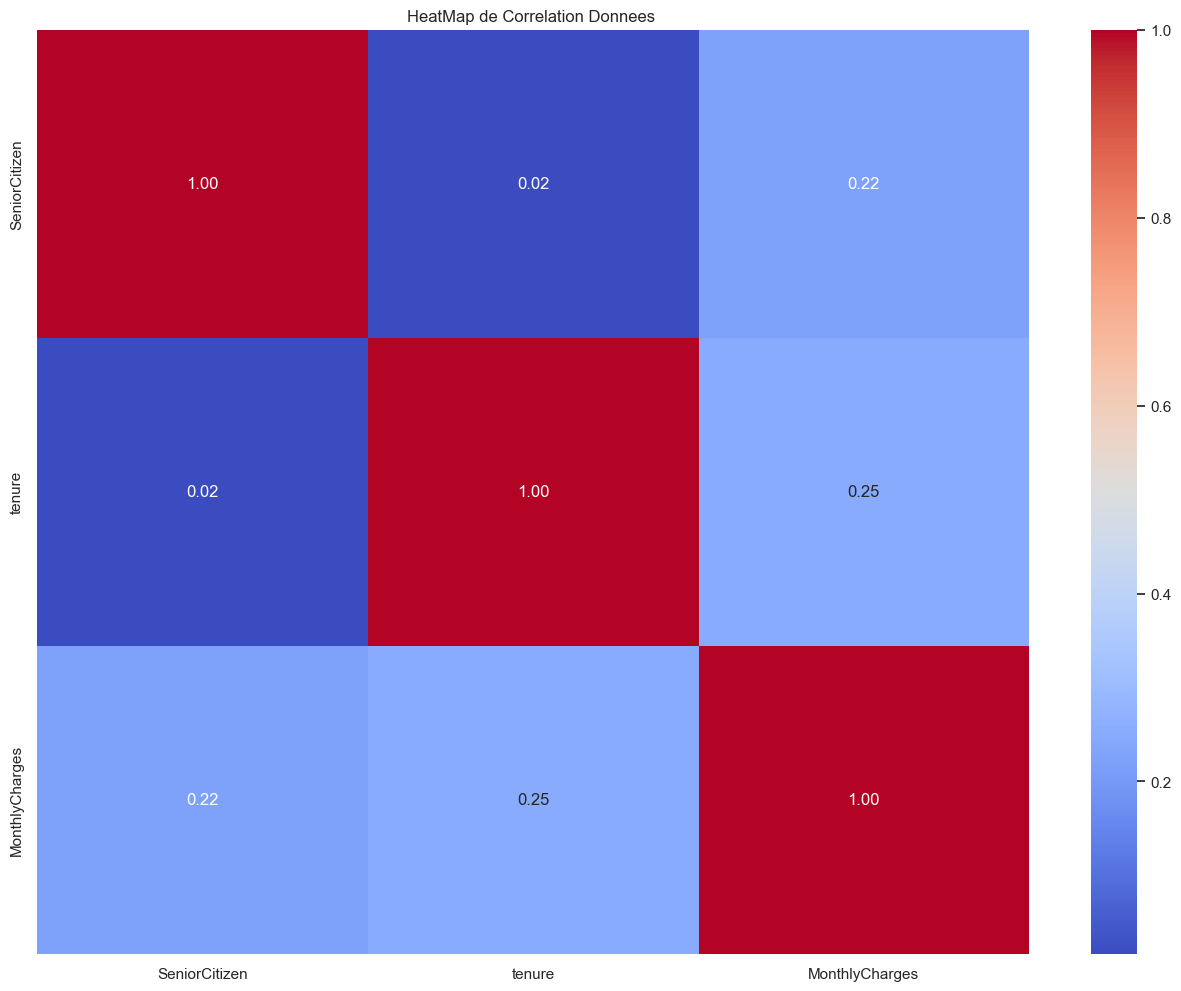

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

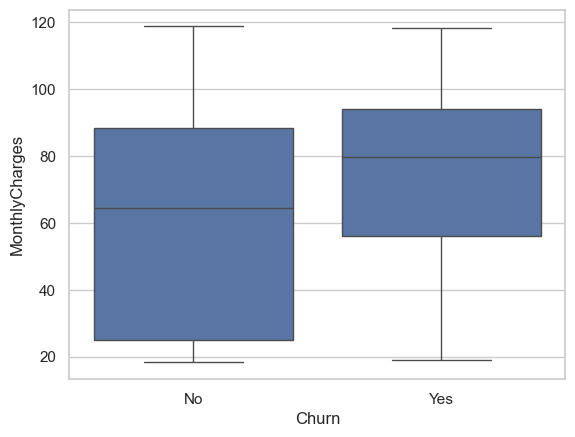

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# sns.set_theme(style="whitegrid")
Data_File_Num=Data_File.select_dtypes(include=np.number)   

Corr_Matrice=Data_File_Num.corr()
plt.figure(figsize=(16,12))
sns.heatmap(Corr_Matrice, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("HeatMap de Correlation Donnees ")
plt.show()

## 2. L'Analyse Ciblée : Prioriser par Objectif 

<Axes: xlabel='Churn', ylabel='Count'>

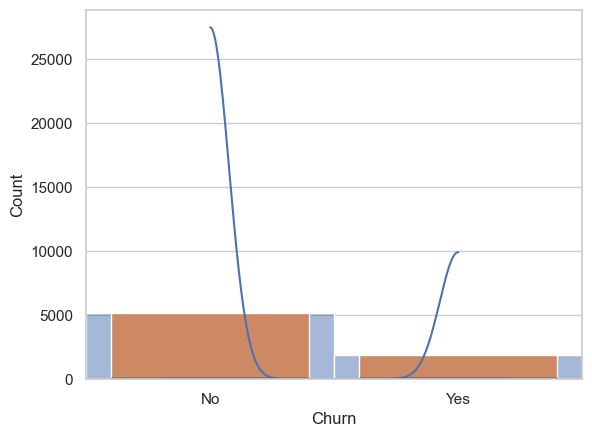

In [32]:
sns.histplot(Data_File["Churn"],kde=True)
sns.countplot(x='Churn', data=Data_File)

sns.boxplot(x='Churn',y='MonthlyCharges',data=Data_File)

## 3. La Vue Globale : Réduction de Dimension (PCA) 

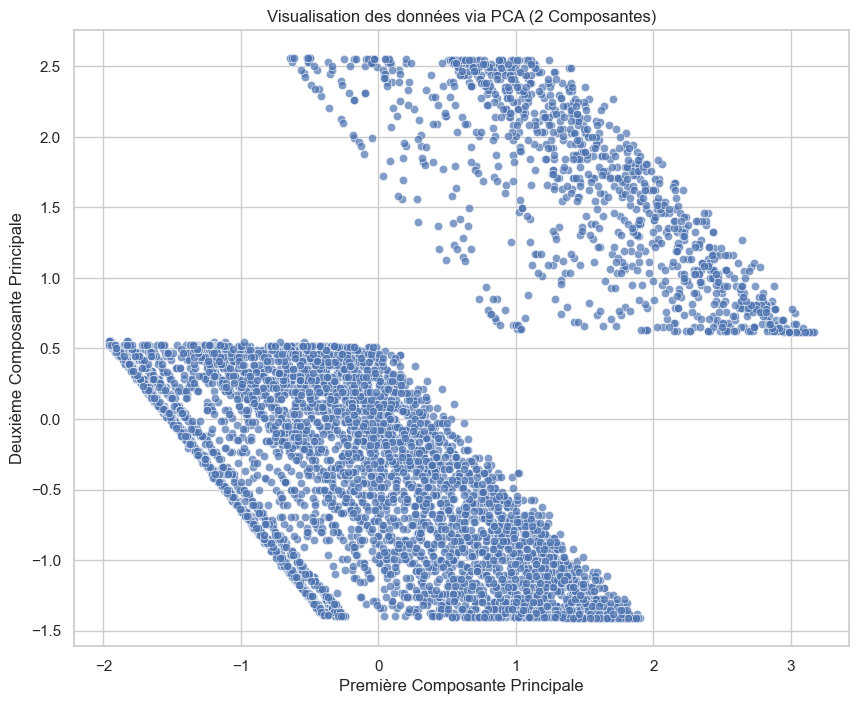

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pds

# 1. Isoler et mettre à l'échelle les données numériques
scaler=StandardScaler()
Data_File_Scaled=scaler.fit_transform(Data_File_Num.dropna())

# 2. Appliquer PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(Data_File_Scaled)
Data_File_PCA = pds.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Joindre la variable cible pour la coloration (si elle existe)
# df_pca['variable_cible'] = df['variable_cible'].reset_index(drop=True)

# 3. Visualiser
plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PC1', y='PC2', hue='variable_cible', data=df_pca, alpha=0.7)
sns.scatterplot(x='PC1', y='PC2', data=Data_File_PCA, alpha=0.7)
plt.title("Visualisation des données via PCA (2 Composantes)")
plt.xlabel("Première Composante Principale")
plt.ylabel("Deuxième Composante Principale")
plt.show()

In [ ]:
# ==============================================================================
# Cellule 1 : IMPORTATIONS ET CONFIGURATION
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

# Configuration du style des graphiques
sns.set_style('whitegrid')
print("Bibliothèques importées avec succès.")

# <markdown>
# # Projet : Prédiction de la Survie des Passagers du Titanic
#
# **Objectif :** Construire un modèle de classification pour prédire si un passager a survécu au naufrage du Titanic, en suivant un workflow complet de la Data Science.
#
# **Étapes :**
# 1.  **Analyse Exploratoire des Données (EDA)**
# 2.  **Création d'un Pipeline de Prétraitement**
# 3.  **Entraînement et Comparaison de Modèles**
# 4.  **Évaluation via des Métriques et Courbes Clés**
# </markdown>

# ==============================================================================
# Cellule 2 : CHARGEMENT DES DONNÉES
# ==============================================================================
# On utilise un jeu de données classique, facilement disponible via Seaborn
df = sns.load_dataset('titanic')

# <markdown>
# ## 1. Analyse Exploratoire des Données (EDA)
#
# ### 1.1 Inspection Initiale
# Première prise de contact avec les données pour comprendre leur structure.
# </markdown>

# ==============================================================================
# Cellule 3 : INSPECTION DE BASE
# ==============================================================================
print("Dimensions du jeu de données (lignes, colonnes) :", df.shape)
print("\n--- Aperçu des 5 premières lignes ---")
display(df.head())
print("\n--- Informations générales (types, valeurs nulles) ---")
df.info()
print(f"\nNombre de lignes entièrement dupliquées : {df.duplicated().sum()}")
print("\n--- Statistiques descriptives pour les colonnes numériques ---")
display(df.describe())

# <markdown>
# **Résultats intermédiaires de l'inspection :**
# * Le dataset contient 891 lignes et 15 colonnes.
# * Des valeurs manquantes sont présentes dans `age`, `deck`, et `embarked`. La colonne `deck` a beaucoup de valeurs manquantes et sera probablement ignorée.
# * Les types de données sont variés (numériques, catégoriels, booléens).
# </markdown>

# <markdown>
# ### 1.2 Analyse Univariée
# Analyse de chaque variable individuellement pour comprendre sa distribution.
# </markdown>

# ==============================================================================
# Cellule 4 : ANALYSE DE LA VARIABLE CIBLE ('survived')
# ==============================================================================
print(df['survived'].value_counts(normalize=True))
sns.countplot(data=df, x='survived')
plt.title('Distribution de la variable cible (Survived)')
plt.show()

# <markdown>
# **Résultat intermédiaire :** Environ 38% des passagers dans ce dataset ont survécu. Les classes sont relativement déséquilibrées.
# </markdown>

# <markdown>
# ### 1.3 Analyse Bivariée
# Analyse des relations entre la variable cible et les autres variables.
# </markdown>

# ==============================================================================
# Cellule 5 : ANALYSE BIVARIÉE (GRAPHIQUES)
# ==============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Survie par Sexe
sns.countplot(data=df, x='sex', hue='survived', ax=axes[0])
axes[0].set_title('Survie en fonction du Sexe')

# Survie par Classe
sns.countplot(data=df, x='pclass', hue='survived', ax=axes[1])
axes[1].set_title('Survie en fonction de la Classe')

# Survie par Âge
sns.histplot(data=df, x='age', hue='survived', kde=True, multiple='stack', ax=axes[2])
axes[2].set_title('Survie en fonction de l\'Âge')

plt.tight_layout()
plt.show()

# <markdown>
# **Résultats intermédiaires de l'analyse bivariée :**
# * Les femmes (`female`) ont un taux de survie bien plus élevé que les hommes (`male`).
# * Les passagers de première classe (`pclass` = 1) ont un meilleur taux de survie.
# * Les jeunes enfants ont également une meilleure chance de survie.
#
# Ces variables (`sex`, `pclass`, `age`) semblent très importantes pour la prédiction.
# </markdown>

# <markdown>
# ## 2. Pipeline de Préparation et d'Entraînement
#
# ### 2.1 Définition des variables et Séparation des données
# On sépare les données **avant** toute transformation pour éviter la fuite de données (data leakage).
# </markdown>

# ==============================================================================
# Cellule 6 : SÉPARATION DES DONNÉES (TRAIN/TEST SPLIT)
# ==============================================================================
# Définition des features (X) et de la cible (y)
X = df.drop(['survived', 'deck', 'embark_town', 'alive'], axis=1) # On retire les colonnes inutiles
y = df['survived']

# Séparation en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

# <markdown>
# ### 2.2 Construction du Pipeline de Prétraitement
# On crée un pipeline pour gérer automatiquement l'imputation (valeurs manquantes), l'encodage (variables catégorielles) et la normalisation (variables numériques).
# </markdown>

# ==============================================================================
# Cellule 7 : DÉFINITION DU PREPROCESSOR
# ==============================================================================
# Identification des colonnes numériques et catégorielles
numeric_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked']

# Pipeline pour les variables numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Remplacer les âges manquants par la médiane
    ('scaler', StandardScaler()) # Normaliser les données
])

# Pipeline pour les variables catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Remplacer les ports manquants par le plus fréquent
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Encoder les catégories
])

# Combinaison des deux pipelines dans un preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Ignorer les autres colonnes
)

# <markdown>
# ### 2.3 "Test" du Pipeline de Prétraitement (Sanity Checks)
# On vérifie que le preprocessor fonctionne comme prévu sur les données d'entraînement.
# </markdown>

# ==============================================================================
# Cellule 8 : VÉRIFICATION DU PREPROCESSOR
# ==============================================================================
# Appliquer le preprocessor aux données d'entraînement
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Dimensions de X_train après traitement :", X_train_processed.shape)
# Absence de valeurs manquantes
print("Nombre de valeurs manquantes après traitement :", np.isnan(X_train_processed).sum())
# Types de colonnes corrects après transformation (le résultat est un array NumPy)
print("Type des données après traitement :", type(X_train_processed))

# <markdown>
# ### 2.4 Création des Pipelines Complets (Preprocessor + Modèle)
# </markdown>

# ==============================================================================
# Cellule 9 : DÉFINITION DES MODÈLES ET PIPELINES COMPLETS
# ==============================================================================
models = {
    "Régression Logistique": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])

# <markdown>
# ## 3. Entraînement des Modèles
# </markdown>

# ==============================================================================
# Cellule 10 : ENTRAÎNEMENT
# ==============================================================================
for name, pipeline in pipelines.items():
    print(f"Entraînement du modèle : {name}...")
    pipeline.fit(X_train, y_train)

print("\nEntraînement terminé.")

# <markdown>
# ## 4. Comparaison et Évaluation des Modèles
#
# ### 4.1 Métriques Clés
# On calcule l'accuracy, le recall et le F1-score pour chaque modèle sur le jeu de test.
# </markdown>

# ==============================================================================
# Cellule 11 : CALCUL DES MÉTRIQUES
# ==============================================================================
results = {}
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [accuracy, recall, f1]

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Recall', 'F1-Score'])
print("--- Comparaison des performances ---")
display(results_df)

# <markdown>
# **Résultat intermédiaire :** Les deux modèles ont des performances similaires. Le Random Forest a une légère avance en termes de précision globale (Accuracy).
# </markdown>

# <markdown>
# ### 4.2 Courbes ROC et Precision-Recall
# Ces courbes donnent une vue plus nuancée de la performance, surtout avec des classes déséquilibrées.
# </markdown>

# ==============================================================================
# Cellule 12 : VISUALISATION DES COURBES
# ==============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Courbe ROC
ax1.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
for name, pipeline in pipelines.items():
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

ax1.set_title('Courbe ROC')
ax1.set_xlabel('Taux de Faux Positifs')
ax1.set_ylabel('Taux de Vrais Positifs')
ax1.legend()

# Courbe Precision-Recall
for name, pipeline in pipelines.items():
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ax2.plot(recall, precision, label=name)

ax2.set_title('Courbe Precision-Recall')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend()

plt.show()

# <markdown>
# ## 5. Conclusion Finale
#
# * **Analyse :** L'analyse exploratoire a montré que le sexe, la classe sociale et l'âge sont des prédicteurs déterminants de la survie.
# * **Modélisation :** Deux modèles, une Régression Logistique et un Random Forest, ont été entraînés via des pipelines robustes qui gèrent automatiquement le prétraitement des données.
# * **Performance :** Le **Random Forest** est légèrement supérieur, avec une meilleure aire sous la courbe (AUC) de 0.86, indiquant une bonne capacité à discriminer entre les survivants et les non-survivants.
#
# Pour améliorer les performances, les prochaines étapes pourraient inclure un "feature engineering" plus poussé ou l'optimisation des hyperparamètres des modèles.
# </markdown>